In [2]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [6]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [7]:
train_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [8]:
train_df.duplicated().sum()

0

In [9]:
train_df['Churn'].value_counts()

Churn
0    199605
1     44182
Name: count, dtype: int64

Text(0, 0.5, 'Count')

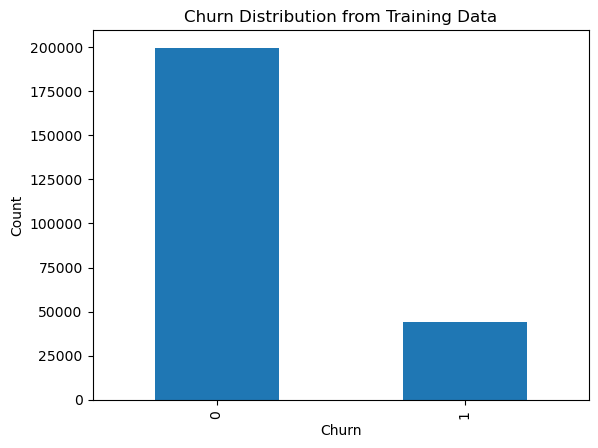

In [10]:
train_df['Churn'].value_counts().plot(kind='bar')

plt.title('Churn Distribution from Training Data')
plt.xlabel('Churn')
plt.ylabel('Count')

Using Decision Tree Classifier


In [11]:
X_train = train_df.drop(['Churn'], axis=1)
y_train = train_df['Churn']

In [12]:
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns

# removing CustomerID column
categorical_columns = categorical_columns.drop(['CustomerID'])

In [13]:
# performing one hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train[categorical_columns])

encoded_cols = encoder.get_feature_names_out(categorical_columns)
X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_columns]), index=X_train.index, columns=encoded_cols)

In [14]:
new_X_train = pd.concat([X_train.drop(categorical_columns, axis=1), X_train_encoded], axis=1)

In [15]:
# training the model
tree = DecisionTreeClassifier(max_depth=3, random_state=0)

In [16]:
# dropping the CustomerID column
new_X_train = new_X_train.drop(['CustomerID'], axis=1)

In [17]:
# fitting the model
tree.fit(new_X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i, idx in enumerate(indices):
    print("%d. %s (%f)" % (i + 1, new_X_train.columns[idx], importances[idx]))

Feature ranking:
1. AccountAge (0.484317)
2. AverageViewingDuration (0.284539)
3. ContentDownloadsPerMonth (0.167153)
4. ViewingHoursPerWeek (0.063991)
5. SubscriptionType_Premium (0.000000)
6. PaperlessBilling_No (0.000000)
7. PaymentMethod_Mailed check (0.000000)
8. PaymentMethod_Electronic check (0.000000)
9. PaymentMethod_Credit card (0.000000)
10. PaymentMethod_Bank transfer (0.000000)
11. SubscriptionType_Standard (0.000000)
12. WatchlistSize (0.000000)
13. SubscriptionType_Basic (0.000000)
14. SubtitlesEnabled_No (0.000000)
15. SupportTicketsPerMonth (0.000000)
16. UserRating (0.000000)
17. TotalCharges (0.000000)
18. MonthlyCharges (0.000000)
19. PaperlessBilling_Yes (0.000000)
20. SubtitlesEnabled_Yes (0.000000)
21. ContentType_Movies (0.000000)
22. ContentType_TV Shows (0.000000)
23. ParentalControl_Yes (0.000000)
24. ParentalControl_No (0.000000)
25. Gender_Male (0.000000)
26. Gender_Female (0.000000)
27. GenrePreference_Sci-Fi (0.000000)
28. GenrePreference_Fantasy (0.00000

In [19]:
X_test_encoded = pd.DataFrame(encoder.transform(test_df[categorical_columns]), columns=encoded_cols, index=test_df.index)
X_test_final = pd.concat([test_df.drop(categorical_columns, axis=1), X_test_encoded], axis=1)

In [20]:
predicted_probability = tree.predict_proba(X_test_final.drop(['CustomerID'], axis=1))[:, 1]

Using Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [22]:
X_train = train_df.drop(['CustomerID','Churn'], axis=1)
y_train = train_df['Churn']

In [23]:
X_test = test_df.drop(['CustomerID'], axis=1)

In [24]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

GridSearchCV

In [64]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
}

In [67]:
rf_model = RandomForestClassifier(random_state=0)

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:
# performing grid search with cross validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# getting the best model and its parameters
best_model = grid_search.best_estimator_
best_model_params = grid_search.best_params_

In [ ]:
# predicted_probability = rf_model.predict_proba(X_test)[:, 1] # for random forest model
predicted_probability = best_model.predict_proba(X_test)[:, 1] # for grid search model

Random Forest Classifier with Feature Selection¶

In [38]:
X_train = train_df.drop(['CustomerID','Churn'], axis=1)
y_train = train_df['Churn']

In [39]:
X_test = test_df.drop(['CustomerID'], axis=1)

In [40]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [41]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [43]:
rf_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Premium'

In [32]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)
importance_df

,feature,importance
0,AccountAge,0.0
10,AverageViewingDuration,0.0
17,ParentalControl,0.0
16,WatchlistSize,0.0
15,Gender,0.0
14,SupportTicketsPerMonth,0.0
13,UserRating,0.0
12,GenrePreference,0.0
11,ContentDownloadsPerMonth,0.0
9,ViewingHoursPerWeek,0.0


In [33]:
selected_features = importance_df[importance_df['importance'] > 0.01]['feature'].values
selected_features

array([], dtype=object)

In [34]:
new_X_train = X_train[selected_features]
new_X_test = X_test[selected_features]

In [35]:
categorical_columns = new_X_train.select_dtypes(include=['object', 'string']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    new_X_train[col] = label_encoder.fit_transform(new_X_train[col])
    new_X_test[col] = label_encoder.transform(new_X_test[col])

In [36]:
# defining the class weights
class_weights = {0: 1, 1: 4}

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=0)
rf_model.fit(new_X_train, y_train)

ValueError: at least one array or dtype is required

Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [45]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [46]:
X_train = train_df.drop(['Churn', 'CustomerID'], axis=1)
y_train = train_df['Churn']
X_test = test_df.drop('CustomerID', axis=1)

In [47]:
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [48]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
logreg_model = LogisticRegression(random_state=0, max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [50]:
predicted_probability = logreg_model.predict_proba(X_test)[:, 1]

Using Neural Networks

In [ ]:
pip install tensorflow

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [52]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
X_train = train_df.drop(['Churn', 'CustomerID'], axis=1)
X_test = test_df.drop('CustomerID', axis=1)
y_train = train_df['Churn']

In [53]:
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Charaf\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 8s 859us/step - accuracy: 0.8155 - loss: 0.4318
Epoch 2/10
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 7s 856us/step - accuracy: 0.8229 - loss: 0.4151
Epoch 3/10
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 6s 838us/step - accuracy: 0.8245 - loss: 0.4127
Epoch 4/10
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 6s 823us/step - accuracy: 0.8254 - loss: 0.4126
Epoch 5/10
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 7s 882us/step - accuracy: 0.8236 - loss: 0.4132
Epoch 6/10
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 6s 845us/step - accuracy: 0.8245 - loss: 0.4118
Epoch 7/10
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 6s 812us/step - accuracy: 0.8244 - loss: 0.4112
Epoch 8/10
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 7s 892us/step - accuracy: 0.8251 - loss: 0.4111
Epoch 9/10
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 7s 867us/step - accuracy: 0.8240 - loss: 0.4110
Epoch 10/10
7619/7619 ━━━━━━━━━━━━━━━━━━━━ 6s 828us/step - accuracy: 0.8249 - loss: 0.4117


In [57]:
predicted_probability = model.predict(X_test)[:, 0]

3265/3265 ━━━━━━━━━━━━━━━━━━━━ 2s 636us/step


In [58]:
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                              'predicted_probability': predicted_probability})

In [59]:
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.106666
1,LFR4X92X8H,0.038874
2,QM5GBIYODA,0.321322
3,D9RXTK2K9F,0.029322
4,ENTCCHR1LR,0.188933
5,7A88BB5IO6,0.423697
6,70OMW9XEWR,0.095694
7,EL1RMFMPYL,0.236528
8,4IA2QPT6ZK,0.180038
9,AEDCWHSJDN,0.230020


Final Tests

In [60]:
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [61]:
assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [62]:
assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [63]:
assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'